In [2]:
# Instagram Influencer Analysis - Clean & Insightful
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load dataset
df = pd.read_csv('C:/Users/akhil/oneDrive/Desktop/Instagram-influencer-Analysis.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1000, 7)


,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M


In [9]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1000 non-null   object 
 1   Rank                  1000 non-null   int64  
 2   Category              916 non-null    object 
 3   Followers             1000 non-null   float64
 4   Audience Country      986 non-null    object 
 5   Authentic Engagement  1000 non-null   object 
 6   Engagement Avg.       1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB
None
Name                     0
Rank                     0
Category                84
Followers                0
Audience Country        14
Authentic Engagement     0
Engagement Avg.          0
dtype: int64


In [10]:
# Step 1: Clean column names
print(df.columns.tolist())

['Name', 'Rank', 'Category', 'Followers', 'Audience Country', 'Authentic Engagement', 'Engagement Avg.']


In [13]:
# Step 2: Convert M/K strings to numeric values
def convert_mk(val):
    if isinstance(val, str):
        val = val.strip().upper().replace(',', '')
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
    try:
        return float(val)
    except:
        return None

df['Followers'] = df['Followers'].apply(convert_mk)
df['Engagement Avg.'] = df['Engagement Avg.'].apply(convert_mk)
df['Authentic Engagement'] = df['Authentic Engagement'].apply(convert_mk)

In [15]:
# Step 3: Calculate engagement rate percentage
df['Engagement Avg._Percent'] = (df['Engagement Avg.'] / df['Followers']) * 100
df['Authentic Engagement_Percent'] = (df['Authentic Engagement'] / df['Followers']) * 100

In [17]:
# Step 4: Top 10 Influencers by Engagement Rate
top_engaged = df.sort_values('Engagement Avg._Percent', ascending=False).head(10)
print(top_engaged[['Name', 'Followers', 'Engagement Avg.', 'Engagement Avg._Percent', 'Authentic Engagement', 'Authentic Engagement_Percent']])

                    Name  Followers  Engagement Avg.  Engagement Avg._Percent  \
772  la_beaute_africaine  1600000.0        1900000.0               118.750000   
674        sugaringcandy  2500000.0        1400000.0                56.000000   
299             jy_piece  4800000.0        2200000.0                45.833333   
843          josephquinn  2500000.0        1100000.0                44.000000   
249           mina_sr_my  5600000.0        2400000.0                42.857143   
101              yawnzzn  9600000.0        4100000.0                42.708333   
193         thinkaboutzu  6600000.0        2800000.0                42.424242   
282              _zyozyo  5500000.0        2100000.0                38.181818   
726         everyone_woo  2900000.0        1100000.0                37.931034   
512             dear.zia  3700000.0        1400000.0                37.837838   

     Authentic Engagement  Authentic Engagement_Percent  
772              919900.0                     57.4

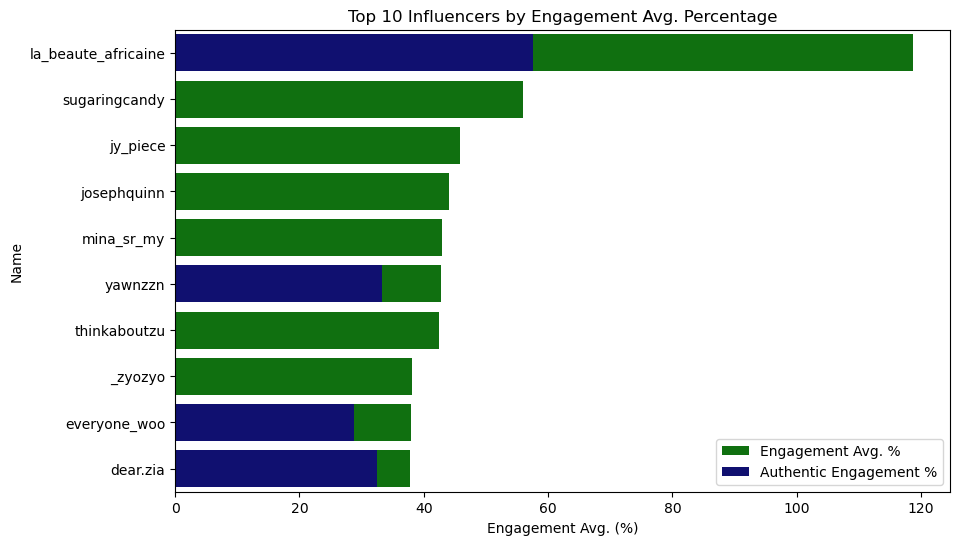

In [19]:
#Plot the top 10 engagement rates
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top_engaged, x='Engagement Avg._Percent', y='Name', color='green', label='Engagement Avg. %')
sns.barplot(data=top_engaged, x='Authentic Engagement_Percent', y='Name', color='navy', label='Authentic Engagement %')
plt.title('Top 10 Influencers by Engagement Avg. Percentage')
plt.xlabel('Engagement Avg. (%)')
plt.legend()
plt.show()

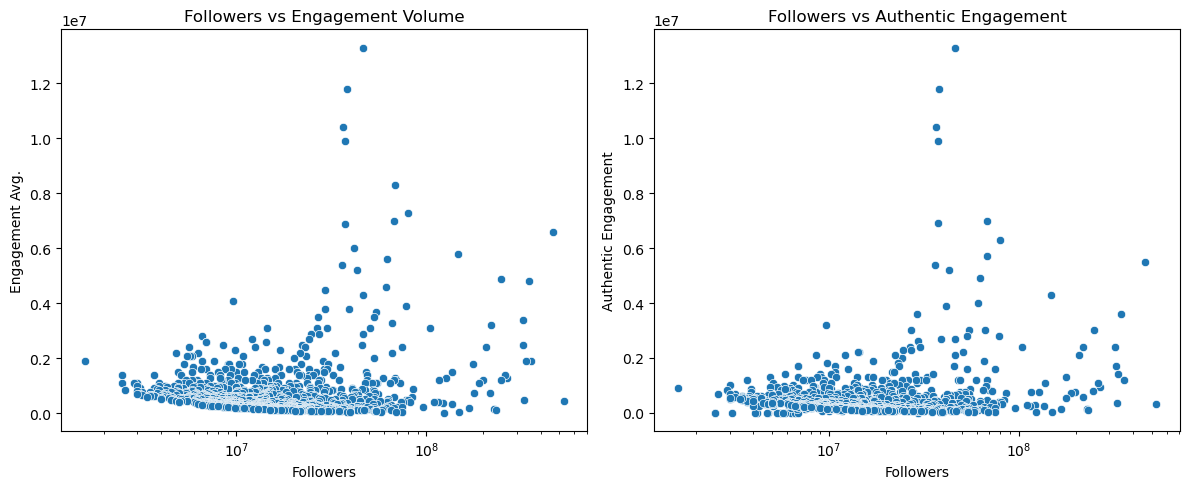

In [21]:
# Step 5: Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Followers vs Engagement
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Followers', y='Engagement Avg.')
plt.xscale('log')
plt.title('Followers vs Engagement Volume')

# Followers vs Authentic Engagement
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Followers', y='Authentic Engagement')
plt.xscale('log')
plt.title('Followers vs Authentic Engagement')

plt.tight_layout()
plt.show()

                      Followers  Engagement Avg.  Authentic Engagement
Followers              1.000000         0.235669              0.216229
Engagement Avg.        0.235669         1.000000              0.967946
Authentic Engagement   0.216229         0.967946              1.000000


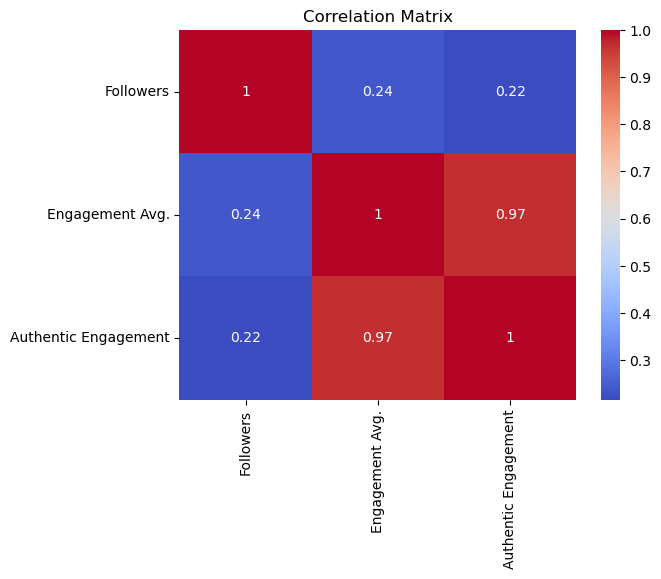

In [23]:
#Correlation Coefficients
correlation = df[['Followers', 'Engagement Avg.', 'Authentic Engagement']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

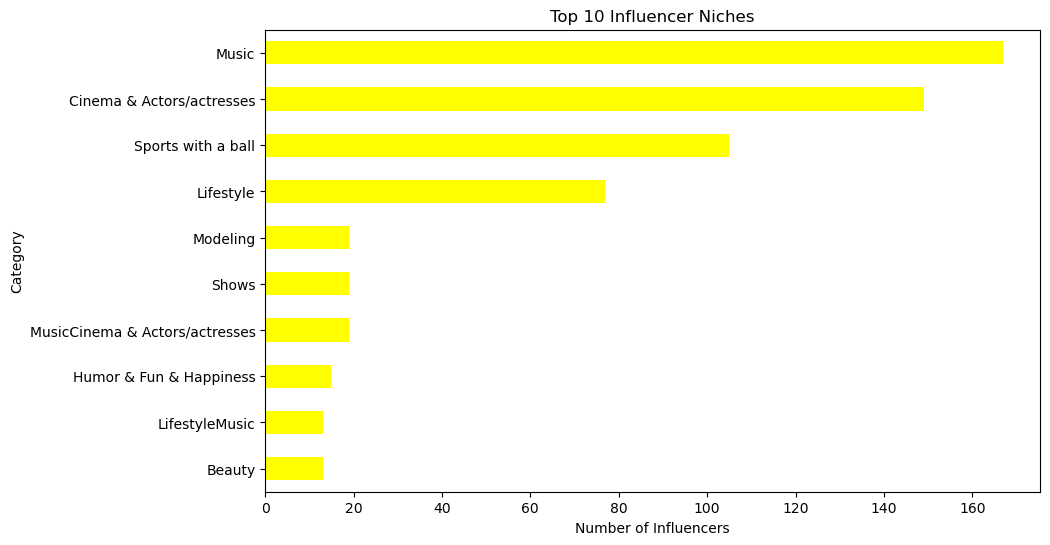

In [25]:
#Top Niches (Categories)
plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='barh', color='yellow')
plt.title('Top 10 Influencer Niches')
plt.xlabel('Number of Influencers')
plt.gca().invert_yaxis()
plt.show()

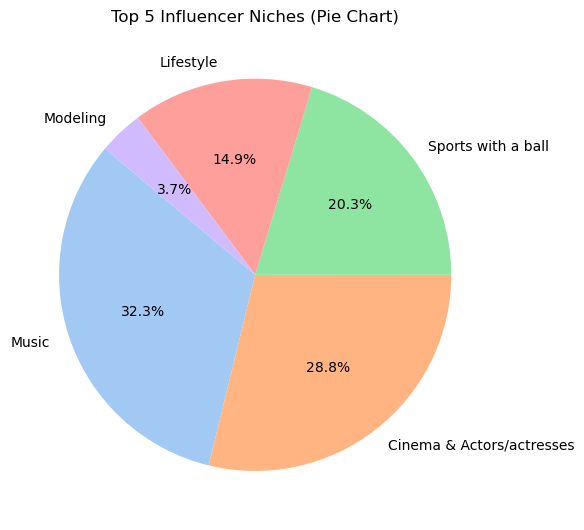

In [26]:
#Pie Chart of Top 5 Niches
top_niches = df['Category'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_niches, labels=top_niches.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Influencer Niches (Pie Chart)')
plt.tight_layout()
plt.show()